# Clustering the 2020 311 data of Los Angeles

Michael Gonzalez

This notebook will outlines the use of three clustering algorithms to organize 311 requests data by location and density. The data will be loaded into dataframes and subset in pandas. The plots will be created in seaborn and matplotlib libraries. There will be additional numerical operations that will be using the numpy library. I will be performing K-Means and DBSCAN with the scikit-learn library. HDBSCAN will be done with hdbscan library.

## Brief Overview

I would need to import the necessary libraries for global data handling tasks and open the data  with pandas. I also need to set a number of global variables that will manage the data flow, this will include the location of the data file. This will also show how far back the clustering operation will reach and how many clusters will evaluate the optimal number of clusters. After setting the global variables, the subset data will be at an manageable size and this will lead to better capture of recent trends.

In [30]:
# Importing needed labraries.
import numpy as np 
import pandas as pd 
from pandas import DataFrame
import matplotlib.pyplot as plt 
import seaborn as sns
import random
import math
from sklearn.cluster import KMeans
from sklearn.cluster import DBSCAN
import hdbscan

# Creating the global variables.
data311 = '...\MyLA311_Service_Request_Data_2020.csv' 
INTEREST = 'Graffiti Removal' # Selecting the variable of interest.
SUBSET = 20000 # Selecting the last subset rows of data by date.
SWEEPMAX = 25 # Selecting the number of clusters to evaluate for the elbow plot.

# Load data into data frame
data = pd.read_csv(data311)

# Optional data subsetting (takes most recent reports)
data = data[np.logical_not(np.isnan(data['Longitude']))]

if len(INTEREST) > 0:
    varFilter = data['RequestType'] == INTEREST
    data = data[varFilter]

if SUBSET:
    data = data[-SUBSET:]

# Displaying the top five rows.
data.head(5)

,SRNumber,CreatedDate,UpdatedDate,ActionTaken,Owner,RequestType,Status,RequestSource,CreatedByUserOrganization,MobileOS,...,Location,TBMPage,TBMColumn,TBMRow,APC,CD,CDMember,NC,NCName,PolicePrecinct
1415115,1-1817043567,12/11/2020 09:29:53 AM,12/11/2020 09:30:42 AM,SR Created,OCB,Graffiti Removal,Closed,Driver Self Report,OCB,NaN,...,"(34.0263849752, -118.267448212)",634,D,7.0,South Los Angeles APC,9.0,NaN,78.0,South Central,NEWTON
1415116,1-1817045271,12/11/2020 09:29:54 AM,12/12/2020 10:50:33 AM,SR Created,OCB,Graffiti Removal,Cancelled,Self Service,Self Service,NaN,...,"(34.0396664019, -118.327762033)",633,F,6.0,South Los Angeles APC,10.0,Herb J. Wesson Jr.,74.0,United Neighborhoods,WILSHIRE
1415120,1-1817045521,12/11/2020 09:31:01 AM,12/11/2020 09:38:59 AM,SR Created,OCB,Graffiti Removal,Closed,Driver Self Report,OCB,NaN,...,"(34.0283891741, -118.269291073)",634,D,7.0,South Los Angeles APC,9.0,NaN,78.0,South Central,NEWTON
1415121,1-1817045526,12/11/2020 09:31:01 AM,12/11/2020 09:39:02 AM,SR Created,OCB,Graffiti Removal,Closed,Driver Self Report,OCB,NaN,...,"(34.0279670014, -118.268210472)",634,D,7.0,South Los Angeles APC,9.0,NaN,78.0,South Central,NEWTON
1415122,1-1817045531,12/11/2020 09:31:01 AM,12/11/2020 09:39:04 AM,SR Created,OCB,Graffiti Removal,Closed,Driver Self Report,OCB,NaN,...,"(34.0279670014, -118.268210472)",634,D,7.0,South Los Angeles APC,9.0,NaN,78.0,South Central,NEWTON


## Data Visualizations

In this next section of the notebook. I will talk about my process with K-Means, DBSCAN and HDBSCAN with the visualization of my results.

## K-Means Clustering Overview

This overview will include clustered points of the data. These clustered points will not include the measurement of density in single clusters. The resulting centroids will have off centered masses.

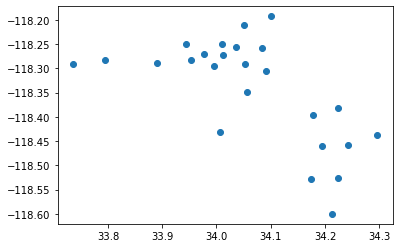

In [33]:
# Selecting the data frame to a variable.
K = DataFrame(data, columns = ['Latitude','Longitude'])

km = KMeans(n_clusters = 25, 
    init = 'random',
    n_init = 10,
    max_iter = 300,
    tol = 1e-04,
    random_state = 0)

y_km = km.fit_predict(K)

# Displaying a scatterplot of the result.
plt.scatter(km.cluster_centers_[ :, 0], km.cluster_centers_[ :, 1])
plt.show()

## Assessing Model Fit Overview 

This overview will test for a well rounded number to be used for the final number of cluster. This distortion function will train a model with a vareity of cluster thresholds. It will assess the sum of squared distance from the centroid. When compared to K-Means inertia.

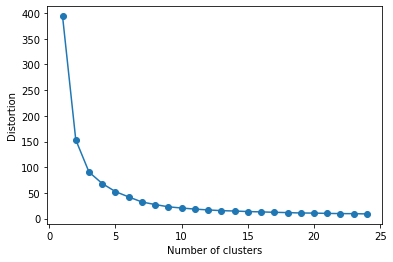

In [32]:
# Creating a distortion array with a K-Means function.
distortions = []

for i in range(1, SWEEPMAX):
    km = KMeans(
        n_clusters = i,
        init = 'random',
        n_init = 10,
        max_iter = 300,
        tol = 1e-04,
        random_state = 0)
    km.fit(K)
    distortions.append(km.inertia_)
    
# Displaying a line plot of the K-means function.
plt.plot(range(1, SWEEPMAX), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')

plt.show()

As you can see in the above plot, the range between 5 to 10 clusters is the best option.

## K-Means with new number of clusters Overview

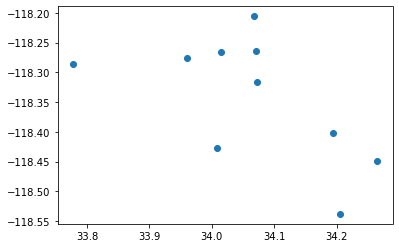

In [36]:
# Selecting the data frame to a variable.
K = DataFrame(data, columns = ['Latitude','Longitude'])

km = KMeans(n_clusters = 10, 
    init = 'random',
    n_init = 10,
    max_iter = 300,
    tol = 1e-04,
    random_state = 0)

y_km = km.fit_predict(K)

# Displaying a scatterplot of the result.
plt.scatter(km.cluster_centers_[ :, 0], km.cluster_centers_[ :, 1])
plt.show()

## DBSCAN Clustering Overview 

DBSCAN takes into account of the cluster's density. The cluster's connects with many nearby neighbors and are more likely to belong to a shared cluster.

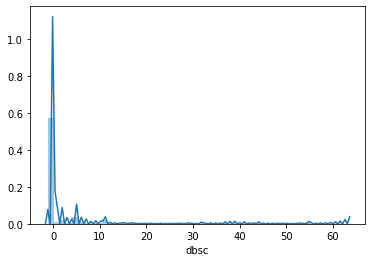

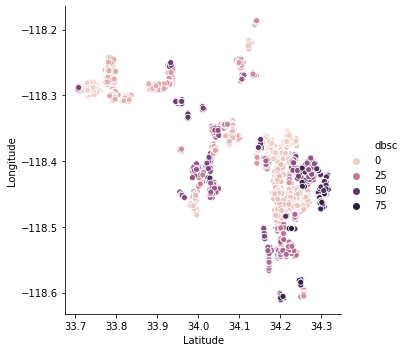

In [38]:
# Selecting the parameters for DBSCAN plot.
dbsc = DBSCAN(eps = .005, min_samples = 15).fit(K)

# Adding a new column called 'dbsc'.
data['dbsc'] = dbsc.labels_

# Displaying the 'dbsc' through a plot.
sns.distplot(data['dbsc'])
sns.relplot(x = 'Latitude', y = 'Longitude', hue = 'dbsc', data = data[data['dbsc'] > 0])
plt.show()

The plots of the resulting clusters are difficult to determine if a cluster really belong in the right place. The largest areas of clusters have little in common with location information.

## HDBSCAN Overview 

HDBSCAN stands for hierarchical method of clustering built on top of DBSCAN. It also has more sections that are related to the cluster's density.

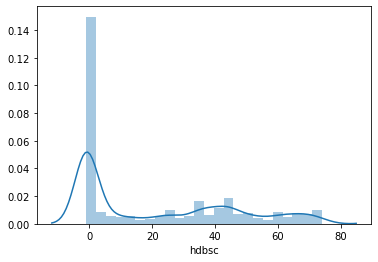

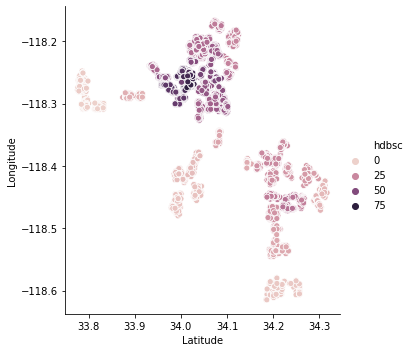

In [39]:
# Selecting the minimum number of cluters.
hdbsc = hdbscan.HDBSCAN(min_cluster_size = 40) 

# Adding a new column called 'hdbsc'.
hdbsc.fit(K)
data['hdbsc'] = hdbsc.labels_

# Displaying the 'hdbsc' through a plot.
sns.distplot(data['hdbsc'])
sns.relplot(x = 'Latitude', y = 'Longitude', hue = 'hdbsc', data = data[data['hdbsc'] > 0])
plt.show()

The plots displays a minimum number of points that are required to be in each of the clusters. The points that are close to zero represent either diffuse clusters or clusters that were hard to be assigned.